In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets as ds
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = ds.load_iris()

In [3]:
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])

In [4]:
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [5]:
df.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [6]:
dfT = df.copy()

In [7]:
dfT['target'] = iris['target']

In [8]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
dfT.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

In [10]:
dfT.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [11]:
def set_tipo(codigo_tipo):
    if codigo_tipo == 0:
        return iris['target_names'][0]
    elif codigo_tipo == 1:
        return iris['target_names'][1]
    elif codigo_tipo == 2:
        return iris['target_names'][2]

In [12]:
dfT['target_name'] = dfT['target'].apply(set_tipo)

In [13]:
dfT.sample(20)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
25                 5.0               3.0                1.6               0.2   
8                  4.4               2.9                1.4               0.2   
140                6.7               3.1                5.6               2.4   
5                  5.4               3.9                1.7               0.4   
136                6.3               3.4                5.6               2.4   
48                 5.3               3.7                1.5               0.2   
58                 6.6               2.9                4.6               1.3   
89                 5.5               2.5                4.0               1.3   
62                 6.0               2.2                4.0               1.0   
95                 5.7               3.0                4.2               1.2   
51                 6.4               3.2                4.5               1.5   
97                 6.2               2.9                4.3               1.3   
6                  4.6               3.4                1.4               0.3   
93                 5.0               2.3                3.3               1.0   
149                5.9               3.0                5.1               1.8   
14                 5.8               4.0                1.2               0.2   
55                 5.7               2.8                4.5               1.3   
9                  4.9               3.1                1.5               0.1   
129                7.2               3.0                5.8               1.6   
56                 6.3               3.3                4.7               1.6   

     target target_name  
25        0      setosa  
8         0      setosa  
140       2   virginica  
5         0      setosa  
136       2   virginica  
48        0      setosa  
58        1  versicolor  
89        1  versicolor  
62        1  versicolor  
95        1  versicolor  
51        1  versicolor  
97        1  versicolor  
6         0      setosa  
93        1  versicolor  
149       2   virginica  
14        0      setosa  
55        1  versicolor  
9         0      setosa  
129       2   virginica  
56        1  versicolor

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


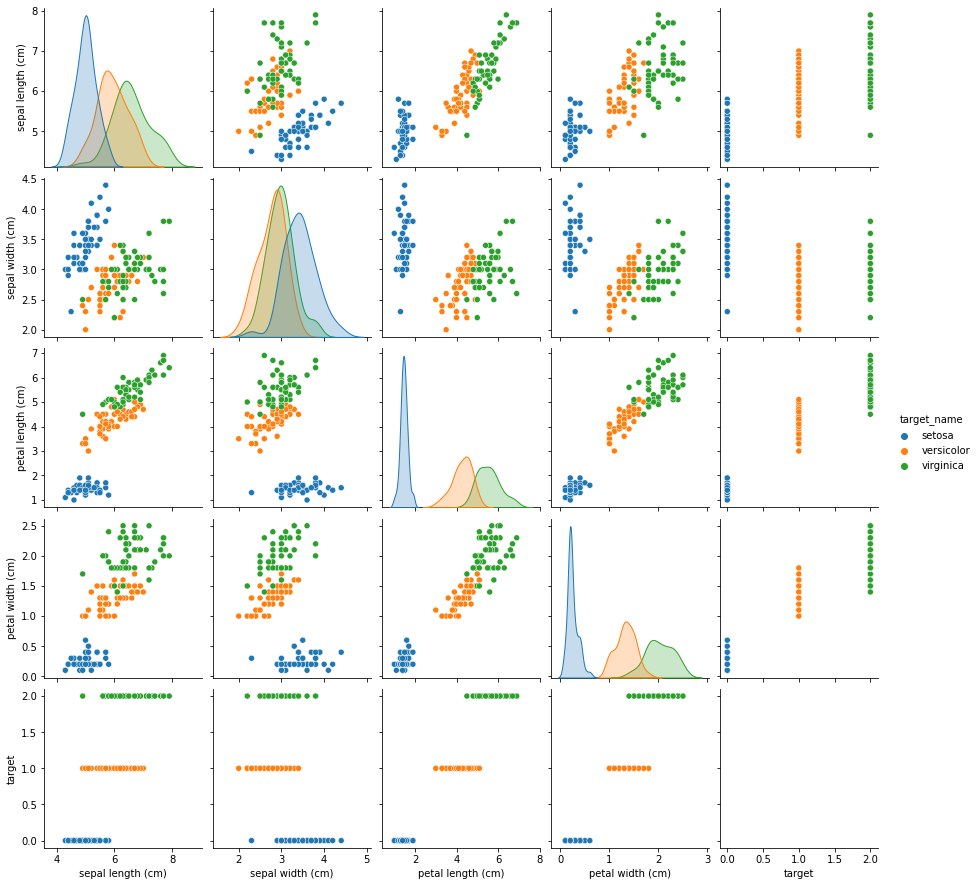

In [14]:
sns.pairplot(data=dfT, hue='target_name')

Data sets usually contain numerical features that have been measured in different units, such as height (in inches) and weight (in pounds). A machine learning algorithm would consider weight more important than height only because the values for weight are larger and have higher variability from person to person.

Machine learning algorithms need to consider all features on an even playing field. That means the values for all features must be transformed to the same scale.

The process of transforming numerical features to use the same scale is known as feature scaling. It’s an important data preprocessing step for most distance-based machine learning algorithms because it can have a significant impact on the performance of your algorithm.

There are several approaches to implementing feature scaling. A great way to determine which technique is appropriate for your dataset is to read scikit-learn’s preprocessing documentation.

In this example, you’ll use the StandardScaler class. This class implements a type of feature scaling called standardization. Standardization scales, or shifts, the values for each numerical feature in your dataset so that the features have a mean of 0 and standard deviation of 1:

In [15]:
dfT.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000

In [16]:
dfT_x = dfT[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]

In [17]:
dfT_x.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

In [18]:
dfT_x.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

In [19]:
scaler = StandardScaler()
dfT_x_scaler = pd.DataFrame(data = scaler.fit_transform(dfT_x), columns= ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])

In [20]:
dfT_x_scaler.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

In [21]:
dfT_x_scaler.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.500000e+02      1.500000e+02       1.500000e+02   
mean       -4.736952e-16     -7.815970e-16      -4.263256e-16   
std         1.003350e+00      1.003350e+00       1.003350e+00   
min        -1.870024e+00     -2.433947e+00      -1.567576e+00   
25%        -9.006812e-01     -5.923730e-01      -1.226552e+00   
50%        -5.250608e-02     -1.319795e-01       3.364776e-01   
75%         6.745011e-01      5.586108e-01       7.627583e-01   
max         2.492019e+00      3.090775e+00       1.785832e+00   

       petal width (cm)  
count      1.500000e+02  
mean      -4.736952e-16  
std        1.003350e+00  
min       -1.447076e+00  
25%       -1.183812e+00  
50%        1.325097e-01  
75%        7.906707e-01  
max        1.712096e+00

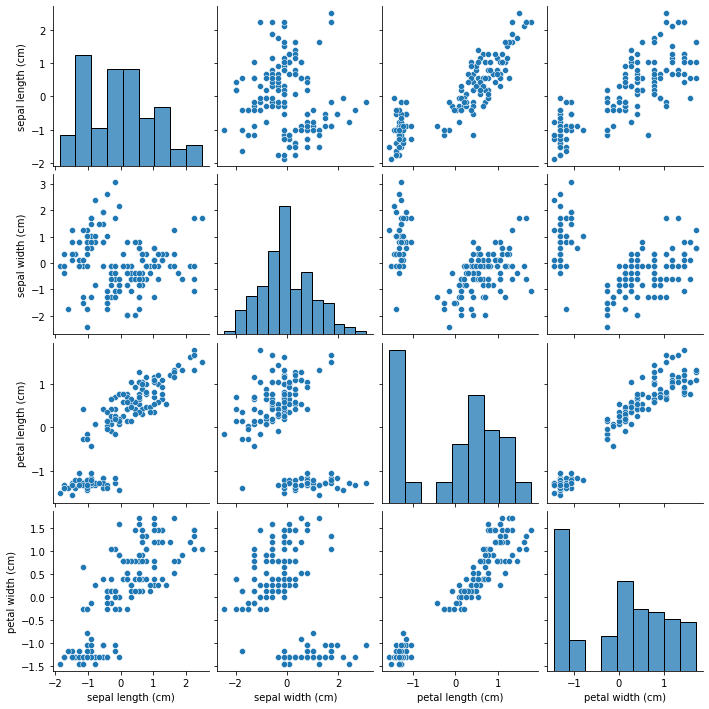

In [22]:
sns.pairplot(data=dfT_x_scaler)

The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares (SOMA DO QUADRADO DOS RESÍDUOS) criterion:
$$ \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2) $$

In [23]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 50,
    'max_iter': 1000,
    'random_state': 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfT_x_scaler)
    sse.append(kmeans.inertia_)

<AxesSubplot:xlabel='Número de Clusters', ylabel='Soma do Quadrado dos Erros'>

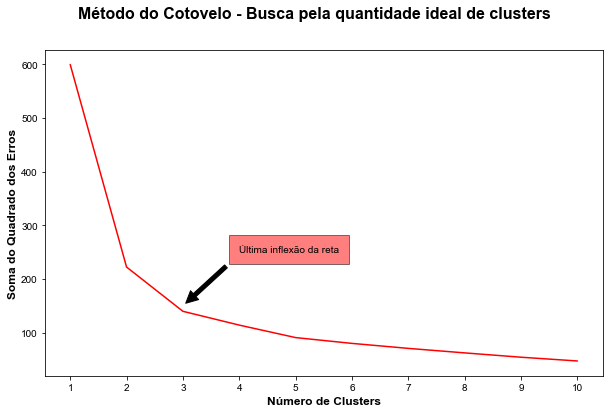

In [24]:
plt.figure(figsize=(10,6))
plt.suptitle('Método do Cotovelo - Busca pela quantidade ideal de clusters', fontsize=16, fontweight='bold')
plt.xlabel('Número de Clusters', fontsize=12, fontweight='bold')
plt.ylabel('Soma do Quadrado dos Erros', fontsize=12, fontweight='bold')
plt.annotate('Última inflexão da reta', xy=(3, 150), xytext=(4, 250),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.xticks(range(1, 11))
sns.set_style('darkgrid')
sns.lineplot(x=range(1,11), y=sse, color='red', linewidth=1.5)

The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster
How far away the data point is from points in other clusters
Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In the scikit-learn implementation of the silhouette coefficient, the average silhouette coefficient of all the samples is summarized into one score. The silhouette score() function needs a minimum of two clusters, or it will raise an exception.

Loop through values of k again. This time, instead of computing SSE, compute the silhouette coefficient:

In [25]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 50,
    'max_iter': 1000,
    'random_state': 42,
}

# A list holds the silhouette coefficients for each k
valores_silhueta = []

# Notice you start at 2 clusters for silhouette coefficient
# Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(dfT_x_scaler)
    score = silhouette_score(dfT_x_scaler, kmeans.labels_, metric='euclidean', random_state= 42)
    valores_silhueta.append(score)

<AxesSubplot:xlabel='Número de Clusters', ylabel='Coeficiente da Silhueta'>

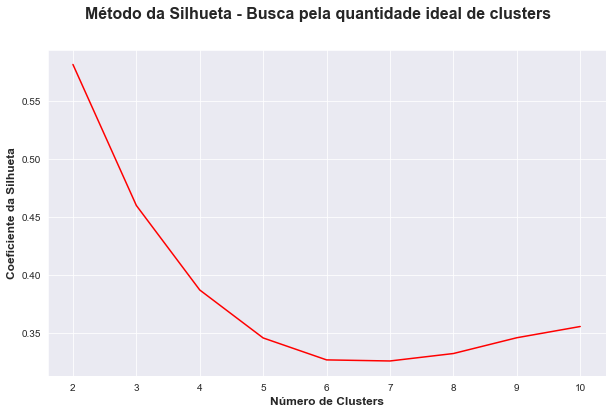

In [26]:
plt.figure(figsize=(10,6))
plt.suptitle('Método da Silhueta - Busca pela quantidade ideal de clusters', fontsize=16, fontweight='bold')
plt.xlabel('Número de Clusters', fontsize=12, fontweight='bold')
plt.ylabel('Coeficiente da Silhueta', fontsize=12, fontweight='bold')
# plt.annotate('Maior valor encontrado', xy=(3, 150), xytext=(4, 250),
#             arrowprops=dict(facecolor='black', shrink=0.05), bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

plt.xticks(range(2, 11))
sns.set_style('darkgrid')
sns.lineplot(x=range(2,11), y=valores_silhueta, color='red', linewidth=1.5)

O método da silhueta aponta que a melhor quantidade de clusters seria 2, já o método do cotovelo indica a quantidade de cluster sendo 3.

Como é preciso avaliar ambos os resultados, opta-se pela quantidade de clusters sendo 3, pois existe uma grande inflexão na reta do método do cotovelo nesse ponto, já a diferença no método da silhueta para clusters 2 e 3 não é tão grande.

In [27]:
kmeans_kwargs = {
    'init': 'k-means++',
    'n_init': 100,
    'max_iter': 10000
}

kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit(X = dfT_x_scaler)

KMeans(max_iter=10000, n_clusters=3, n_init=100)

In [28]:
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [29]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [30]:
dfT_x['target'] = kmeans.predict(dfT_x_scaler)

<ipython-input-30-65ec317edf24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfT_x['target'] = kmeans.predict(dfT_x_scaler)


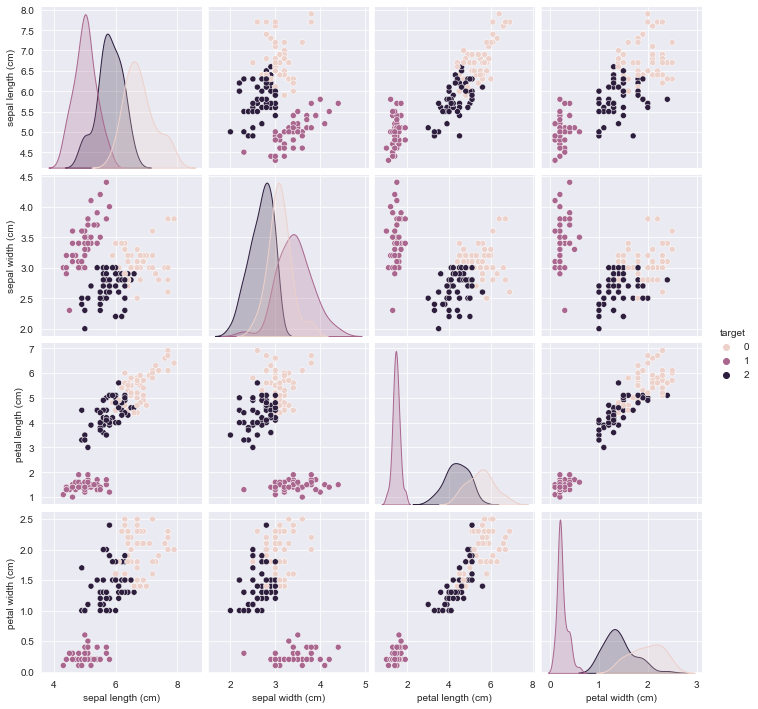

In [31]:
sns.pairplot(data=dfT_x, hue='target')

In [32]:
df_resultado = dfT_x.copy()

In [33]:
df_resultado.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1

In [54]:
translateDic = { 0: 'virginica', 1: 'setosa', 2: 'versicolor' }
df_resultado['target_name'] = [translateDic[s] for s in df_resultado['target']]

In [55]:
df_resultado.sample(10)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
7                  5.0               3.4                1.5               0.2   
9                  4.9               3.1                1.5               0.1   
140                6.7               3.1                5.6               2.4   
119                6.0               2.2                5.0               1.5   
53                 5.5               2.3                4.0               1.3   
137                6.4               3.1                5.5               1.8   
47                 4.6               3.2                1.4               0.2   
89                 5.5               2.5                4.0               1.3   
115                6.4               3.2                5.3               2.3   
36                 5.5               3.5                1.3               0.2   

     target target_name  
7         1      setosa  
9         1      setosa  
140       0   virginica  
119       2  versicolor  
53        2  versicolor  
137       0   virginica  
47        1      setosa  
89        2  versicolor  
115       0   virginica  
36        1      setosa

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


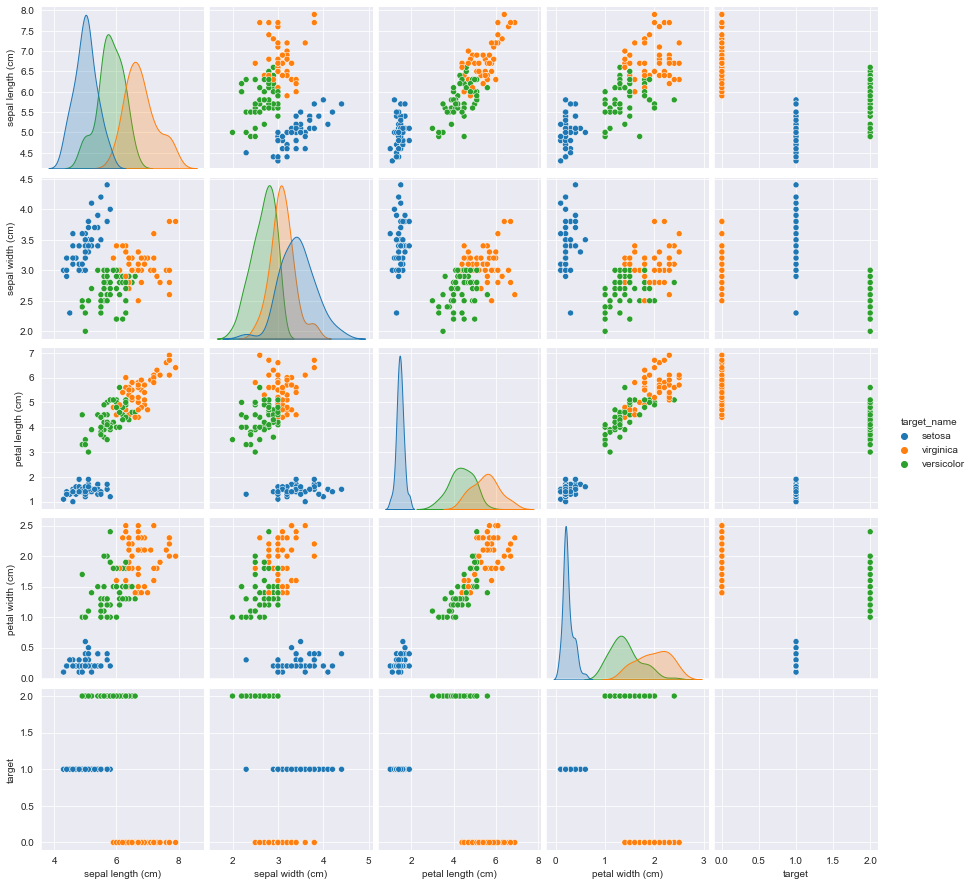

In [56]:
sns.pairplot(data=df_resultado, hue='target_name')

C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Desenvolvimento\anaconda3\envs\dissertacao\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


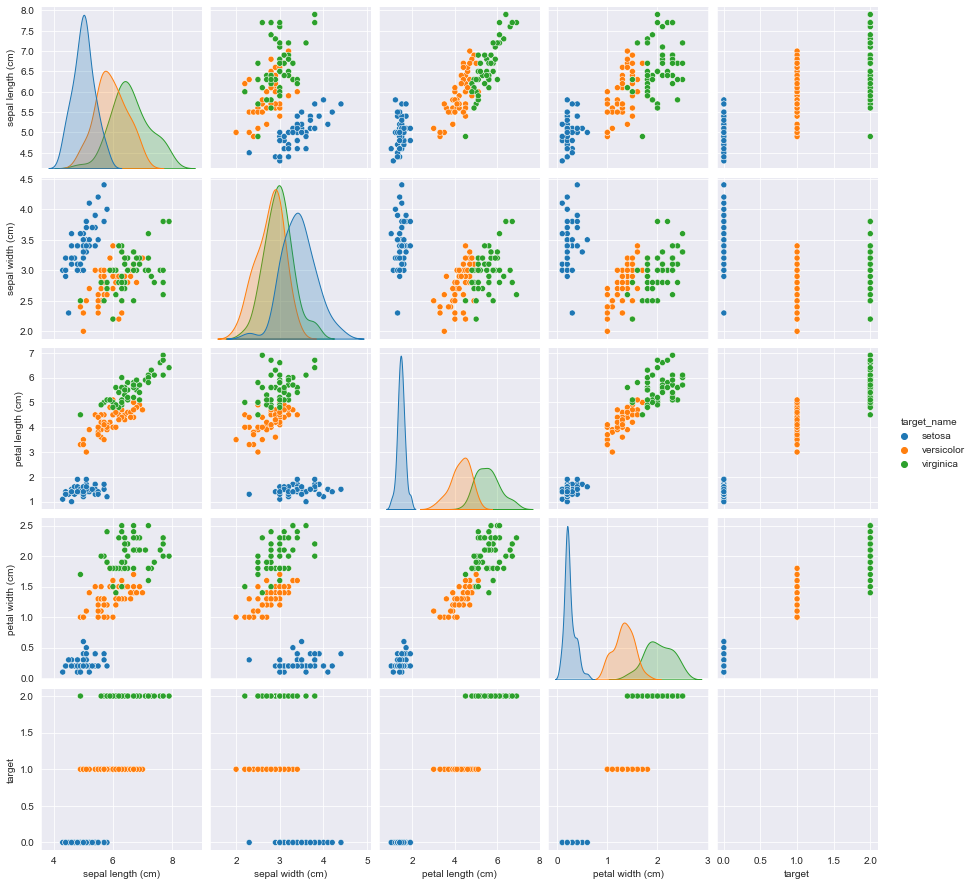

In [57]:

sns.pairplot(data=dfT, hue='target_name')

In [68]:
cm = confusion_matrix(dfT['target_name'], df_resultado['target_name'])
df_cm = pd.DataFrame(cm, index=('Real = ' + pd.DataFrame(iris.target_names)[0]), 
    columns=('Prev = ' + pd.DataFrame(iris.target_names)[0]))
df_cm.head()

0                  Prev = setosa  Prev = versicolor  Prev = virginica
0                                                                    
Real = setosa                 50                  0                 0
Real = versicolor              0                 39                11
Real = virginica               0                 14                36

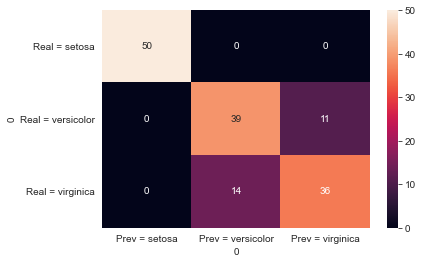

In [70]:
sns.heatmap(df_cm, annot=True)
plt.show()

In [71]:
accuracy_score(dfT['target_name'], df_resultado['target_name'])

0.8333333333333334

In [39]:
iris = ds.load_iris()
df = pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
df['target'] = iris['target']
iris['target_names']
def set_tipo(codigo_tipo):
    if codigo_tipo == 0:
        return iris['target_names'][0]
    elif codigo_tipo == 1:
        return iris['target_names'][1]
    elif codigo_tipo == 2:
        return iris['target_names'][2]
df['target_name'] = df['target'].apply(set_tipo)

In [40]:
df.to_csv('iris_dataset.csv', index = False, header=True)